In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### check for null values

In [4]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### The missing values are represented by "?" and they are replaced with the string "unknown" 

In [6]:
def replace_nan(df,var):
    df[var]=df[var].replace('?','unknown')
    return df[var]
    

In [7]:
for feature in data:
    replace_nan(data,feature)

In [8]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,unknown,77053,HS-grad,9,Widowed,unknown,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,unknown,186061,Some-college,10,Widowed,unknown,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Representing "Income" feature in 1's and 0's

In [9]:
data['income']=data['income'].map({'<=50K':0,'>50K':1})
data['income']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int64

In [10]:
df=data.copy()

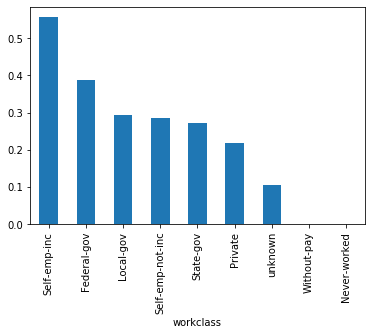

In [12]:
df.groupby('workclass')['income'].mean().sort_values(ascending=False).plot(kind='bar')

### The persons in the "Self-emp-inc" category has the highest probability(>50%) of having salary of >50K

### The persons in the "Federal-gov" category has  probability(40%) of having salary of >50K

### Label encoding is done on the "workclass" feature

In [13]:
df['workclass'].unique()

array(['unknown', 'Private', 'State-gov', 'Federal-gov',
       'Self-emp-not-inc', 'Self-emp-inc', 'Local-gov', 'Without-pay',
       'Never-worked'], dtype=object)

In [15]:
label={
    'Self-emp-inc':7,
    'Federal-gov':6,
    'Local-gov':5,
    'Self-emp-not-inc':4,
    'State-gov':3,
    'Private':2,
    'unknown':1,
    'Without-pay':0,
    'Never-worked':0
}

In [18]:
df['workclass']=df['workclass'].map(label)

In [19]:
df['workclass'].unique()

array([1, 2, 3, 6, 4, 7, 5, 0], dtype=int64)

In [20]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,1,77053,HS-grad,9,Widowed,unknown,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,2,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,1,186061,Some-college,10,Widowed,unknown,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,2,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,2,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


### Since "education"  and "education.num" provides the same information we are dropping the "education"feature

In [22]:
df.drop('education',axis=1,inplace=True)

In [23]:
df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,1,77053,9,Widowed,unknown,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,2,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,1,186061,10,Widowed,unknown,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,2,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,2,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


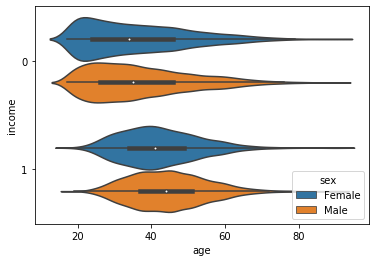

In [26]:
sns.violinplot(x='age',y='income',hue='sex',data=df,orient='h')

### From the above graph we can see that the person having the age >25 and <50 have the highest chances of getting salary of > 50K

In [27]:
df['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [32]:
df['marital.status']=df['marital.status'].replace(['Widowed', 'Divorced', 'Separated', 'Never-married'],'single')

In [33]:
df['marital.status']=df['marital.status'].replace(['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],'married')

In [34]:
df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,1,77053,9,single,unknown,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,2,132870,9,single,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,1,186061,10,single,unknown,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,2,140359,4,single,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,2,264663,10,single,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


### Mapping the "marital.status" feature to 1's and 0's

In [35]:
df['marital.status']=df['marital.status'].map({'single':0,'married':1})
df['marital.status'].unique()

array([0, 1], dtype=int64)

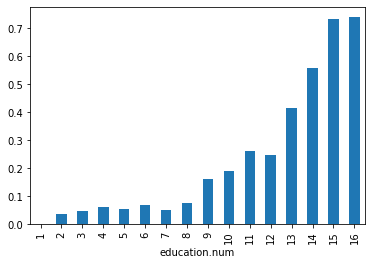

In [36]:
df.groupby('education.num')['income'].mean().plot(kind='bar')

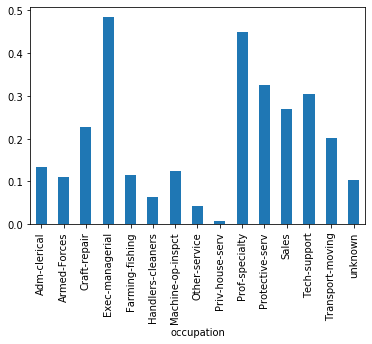

In [37]:
df.groupby('occupation')['income'].mean().plot(kind='bar')
#since occupation is more correlated to education we will take only the education.num feature

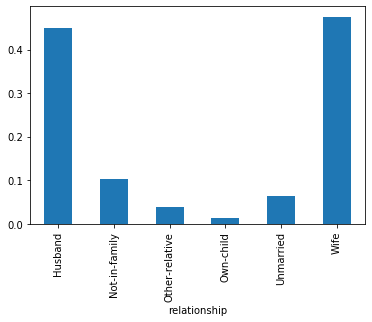

In [38]:
df.groupby('relationship')['income'].mean().plot(kind='bar')
#since the relationship feature is more correlated to marital.status feature we will take only the maritalstatus feature

In [39]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'income'],
      dtype='object')

In [41]:
columns=['age', 'workclass', 'fnlwgt', 'education.num', 'marital.status','capital.gain','capital.loss', 'hours.per.week','income']

In [43]:
df=df[columns]

In [44]:
df.head()

,age,workclass,fnlwgt,education.num,marital.status,capital.gain,capital.loss,hours.per.week,income
0,90,1,77053,9,0,0,4356,40,0
1,82,2,132870,9,0,0,4356,18,0
2,66,1,186061,10,0,0,4356,40,0
3,54,2,140359,4,0,0,3900,40,0
4,41,2,264663,10,0,0,3900,40,0


In [45]:
y=df['income']

In [46]:
df.drop('income',axis=1,inplace=True)

F:\anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [47]:
df.head()

,age,workclass,fnlwgt,education.num,marital.status,capital.gain,capital.loss,hours.per.week
0,90,1,77053,9,0,0,4356,40
1,82,2,132870,9,0,0,4356,18
2,66,1,186061,10,0,0,4356,40
3,54,2,140359,4,0,0,3900,40
4,41,2,264663,10,0,0,3900,40


### Feature Selection
### 1. Correlation Matrix

In [48]:
def remove_high_corr(df,threshold):
    matrix=df.corr()
    result=[]
    
    for i in range(len(matrix)):
        for j in range(i):
            if matrix.iloc[i][j] > threshold:
                res=df.columns[i]
                result.append(res)
    return result

In [53]:
remove_high_corr(df,0.9)

[]

### The are no highly correlated features in this dataset

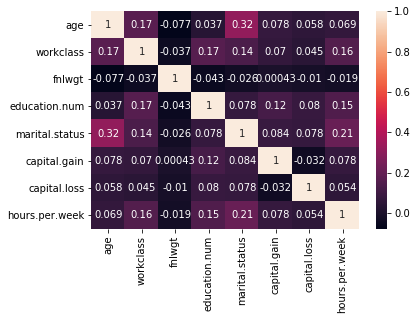

In [54]:
sns.heatmap(data=df.corr(),annot=True)

In [62]:
#Since XGBOOST is Robust to outliers we are not handling any outliers

In [66]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [67]:
xscaled=scalar.fit_transform(df)
xscaled

array([[ 3.76961234, -1.16543381, -1.06799736, ..., -0.14592048,
        10.59350656, -0.03542945],
       [ 3.18311167, -0.44620993, -0.53916866, ..., -0.14592048,
        10.59350656, -1.81720429],
       [ 2.01011032, -1.16543381, -0.03521956, ..., -0.14592048,
        10.59350656, -0.03542945],
       ...,
       [ 0.10398314, -0.44620993, -0.33543266, ..., -0.14592048,
        -0.21665953, -0.03542945],
       [ 1.42360965, -0.44620993, -0.35877741, ..., -0.14592048,
        -0.21665953, -0.03542945],
       [-1.21564337, -0.44620993,  0.11095988, ..., -0.14592048,
        -0.21665953, -1.65522476]])

In [55]:
from sklearn.model_selection import train_test_split

In [68]:
xtrain,xtest,ytrain,ytest=train_test_split(xscaled,y,test_size=0.20,random_state=10)

In [69]:
xtrain.shape

(26048, 8)

In [70]:
xtest.shape

(6513, 8)

In [71]:
ytrain.shape

(26048,)

In [72]:
ytest.shape

(6513,)

In [73]:
from xgboost import XGBClassifier


In [74]:
xgg=XGBClassifier(objective='binary:logistic')
clf=xgg.fit(xtrain,ytrain)

F:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [75]:
pred=clf.predict(xtest)

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.8616612927990174

In [ ]:
XGBClassifier()

In [79]:
param_grid={
   
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}

In [77]:
from sklearn.model_selection import GridSearchCV

In [80]:
grid=GridSearchCV(estimator=xgg,param_grid=param_grid,n_jobs=-1,verbose=3)

In [81]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


F:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:19:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:19:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                            

In [82]:
grid.best_params_

{' learning_rate': 1, 'max_depth': 3, 'n_estimators': 100}

In [83]:
model=XGBClassifier(learning_rate=1,max_depth=3,n_estimators=100)

In [84]:
model.fit(xtrain,ytrain)

F:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:20:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [90]:
pred=model.predict(xtest)

In [91]:
score=accuracy_score(ytest,pred)

In [92]:
score

0.8582834331337326

In [88]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve

In [93]:
TP=confusion_matrix(ytest,pred)[0][0]
FP=confusion_matrix(ytest,pred)[0][1]
FN=confusion_matrix(ytest,pred)[1][0]
TN=confusion_matrix(ytest,pred)[1][1]

In [94]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
Accuracy

0.8582834331337326

In [95]:
Recall=(TP)/(TP+FN)
Recall

0.8852050594097355

In [96]:
Precison=TP/(TP+FP)
Precison

0.9344527614808821

In [97]:
roc_auc=roc_auc_score(ytest,pred)
roc_auc

0.7764620495302499

In [99]:
fpr,tpr,threshold=roc_curve(ytest,pred)

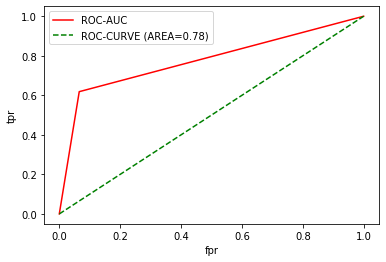

In [101]:
fig,ax=plt.subplots()
plt.plot(fpr,tpr,label='ROC-AUC',color='red')
plt.plot([0,1],[0,1],color='green',linestyle='--',label='ROC-CURVE (AREA=%.2f)' %roc_auc)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
plt.show()